In [80]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
PA = pd.read_csv('previous_application.csv')

### Data Inspection

In [48]:
for x in PA.columns:
    print(x)
    print(PA[x].describe())
    print('--------------')

SK_ID_PREV
count    1.670214e+06
mean     1.923089e+06
std      5.325980e+05
min      1.000001e+06
25%      1.461857e+06
50%      1.923110e+06
75%      2.384280e+06
max      2.845382e+06
Name: SK_ID_PREV, dtype: float64
--------------
SK_ID_CURR
count    1.670214e+06
mean     2.783572e+05
std      1.028148e+05
min      1.000010e+05
25%      1.893290e+05
50%      2.787145e+05
75%      3.675140e+05
max      4.562550e+05
Name: SK_ID_CURR, dtype: float64
--------------
NAME_CONTRACT_TYPE
count        1670214
unique             4
top       Cash loans
freq          747553
Name: NAME_CONTRACT_TYPE, dtype: object
--------------
AMT_ANNUITY
count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64
--------------
AMT_APPLICATION
count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      

### Impute/ Remove missing Values

In [49]:
# Percentage of missing values in each column of previous application dataset
PA_missing = PA.isna().mean().sort_values(ascending = False)
PA_missing = PA_missing*100
PA_missing

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [50]:
# columns to be dropped with missing values greater than 50% in the previous application dataset
col_drop = list(PA_missing[PA_missing.values>50].index)
col_drop

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT']

In [51]:
PA.drop(col_drop,axis = 1,inplace = True)

In [52]:
# Remaining columns with missing values less than 50%
PA_missing_remaining = PA.isna().mean().sort_values(ascending = False)
PA_missing_remaining = PA_missing_remaining*100
PA_missing_remaining[PA_missing_remaining.values>0]


NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
dtype: float64

In [53]:
# list of columns where missing values<50% and checking whether they are categorical or numberical
PA_missing_col_list = list(PA_missing_remaining[PA_missing_remaining.values>0].index)
for x in PA_missing_col_list:
    print(PA[x].describe())
    print('---------------------')

count            849809
unique                7
top       Unaccompanied
freq             508970
Name: NAME_TYPE_SUITE, dtype: object
---------------------
count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64
---------------------
count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64
---------------------
count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64
---------------------
count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000

### Handling Missing values in Categorical Columns

In [54]:
# for catgeorical columns we impute missing values as 'missing' if percentage of missing values is >15%
#and clearly in NAME_TYPE_SUITE has 49% 
PA.NAME_TYPE_SUITE = PA.NAME_TYPE_SUITE.fillna('missing')
# for catgeorical columns we impute missing values with median if percentage of missing values is <15%
#and PRODUCT_COMBINATION has 0.02% 
PA.PRODUCT_COMBINATION = PA.PRODUCT_COMBINATION.fillna(PA.PRODUCT_COMBINATION.mode()[0])


In [55]:
PA_missing_col_list.remove('NAME_TYPE_SUITE')

In [56]:
PA_missing_col_list.remove('PRODUCT_COMBINATION')

In [57]:
for x in PA_missing_col_list:
    print(x)
    print('-------------------')
    print(PA[x].describe())   
   

DAYS_FIRST_DRAWING
-------------------
count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64
DAYS_TERMINATION
-------------------
count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64
DAYS_LAST_DUE
-------------------
count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64
DAYS_LAST_DUE_1ST_VERSION
-------------------
count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243

In [58]:
# List of Categorical columns in the previous application
categorical_column_PREV = []
for x in PA.columns:
    if PA[x].dtype == 'object':
        categorical_column_PREV.append(x)

In [59]:
categorical_column_PREV

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [60]:
# List of numerical columns in the previous application
numerical_column_PREV = []
for x in PA.columns:
    if PA[x].dtype != 'object':
        numerical_column_PREV.append(x)

In [61]:
numerical_column_PREV

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

### Quantile([0.25,0.5,0.75,0.8,0.9,0.95,0.99,1]) distribution of Data 

SK_ID_PREV


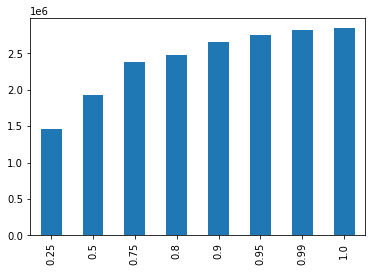

SK_ID_CURR


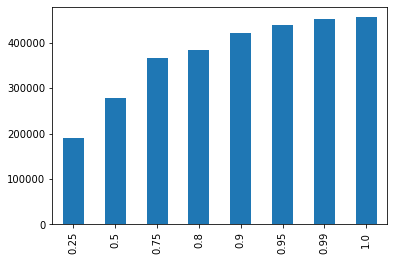

AMT_ANNUITY


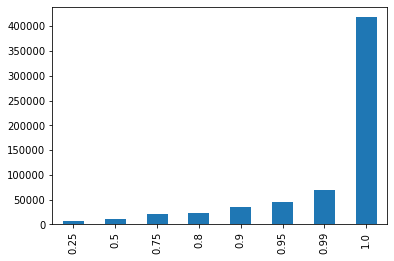

AMT_APPLICATION


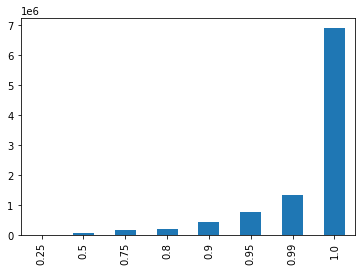

AMT_CREDIT


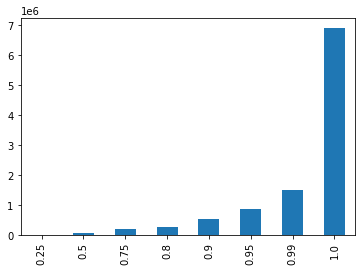

AMT_GOODS_PRICE


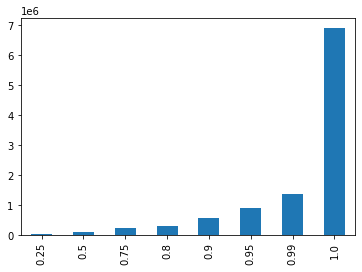

HOUR_APPR_PROCESS_START


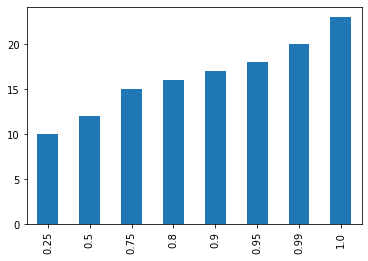

NFLAG_LAST_APPL_IN_DAY


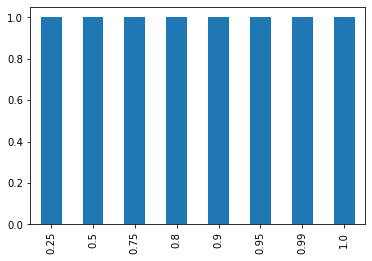

DAYS_DECISION


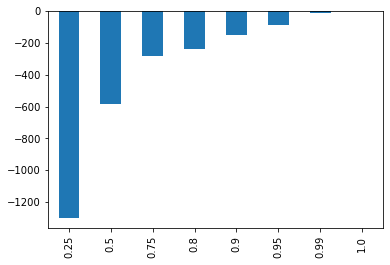

SELLERPLACE_AREA


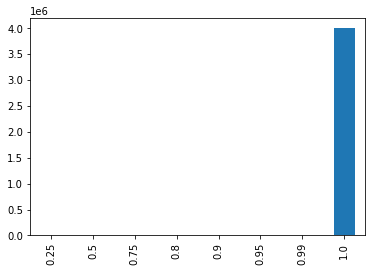

CNT_PAYMENT


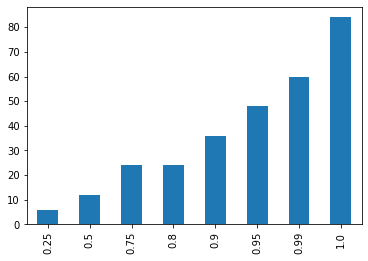

DAYS_FIRST_DRAWING


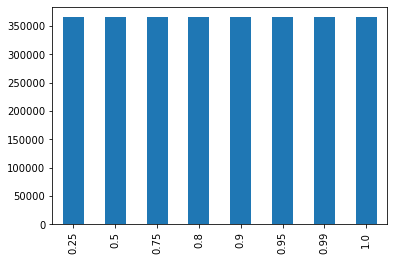

DAYS_FIRST_DUE


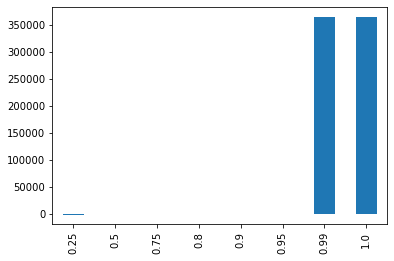

DAYS_LAST_DUE_1ST_VERSION


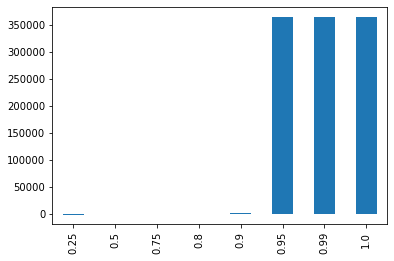

DAYS_LAST_DUE


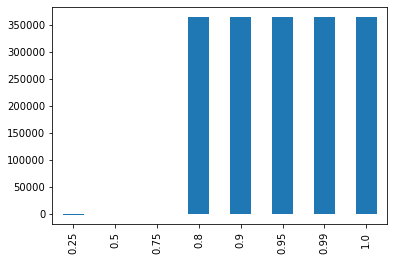

DAYS_TERMINATION


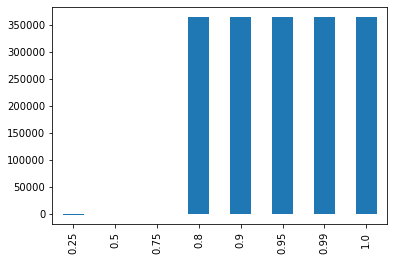

NFLAG_INSURED_ON_APPROVAL


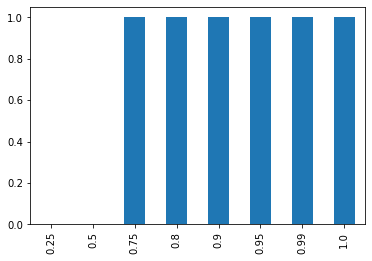

In [62]:
for x in numerical_column_PREV:
    print(x)
    PA[x].quantile([0.25,0.5,0.75,0.8,0.9,0.95,0.99,1]).plot.bar()
    plt.show()
    

In [63]:
categorical_column_PREV

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [64]:
# Imputing the missing values in numerical columns with median as there are outliers 
# This we can observe the mean and median values as we saw above. 
for x in PA_missing_col_list:
    PA[x] = PA[x].fillna(PA[x].median())

In [65]:
# missing values are handled
PA.isna().sum()  

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_

In [66]:
PA.shape

(1670214, 33)

### Univariate Analysis

NAME_CONTRACT_TYPE


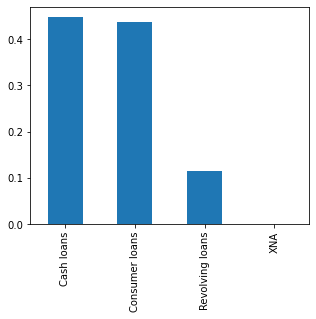

WEEKDAY_APPR_PROCESS_START


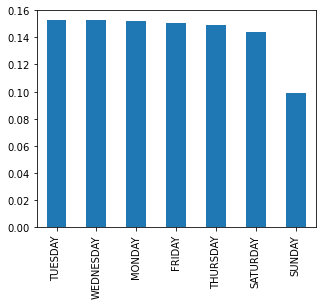

FLAG_LAST_APPL_PER_CONTRACT


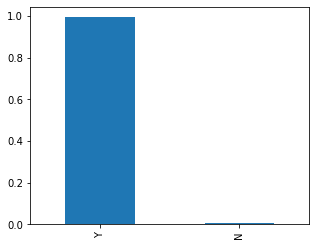

NAME_CASH_LOAN_PURPOSE


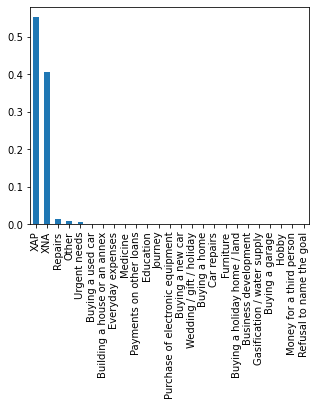

NAME_CONTRACT_STATUS


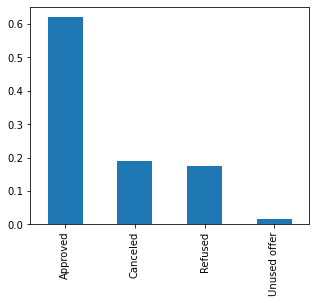

NAME_PAYMENT_TYPE


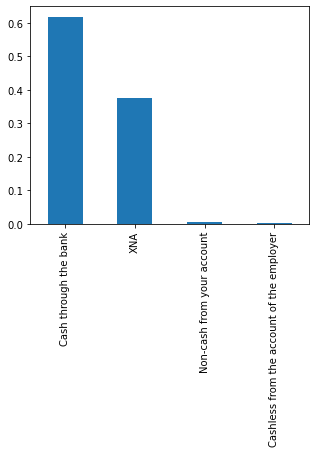

CODE_REJECT_REASON


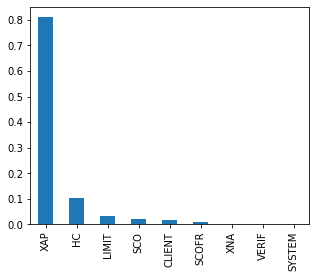

NAME_TYPE_SUITE


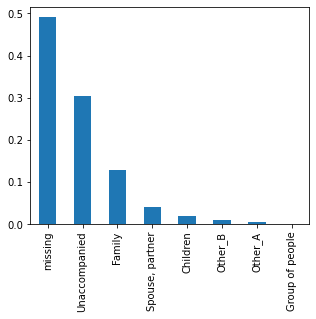

NAME_CLIENT_TYPE


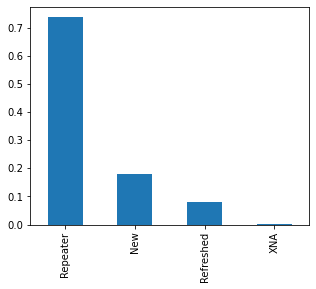

NAME_GOODS_CATEGORY


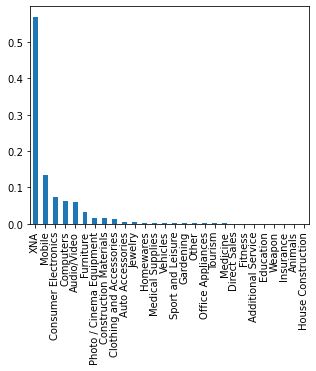

NAME_PORTFOLIO


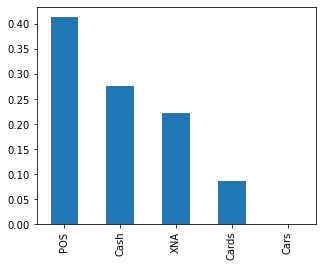

NAME_PRODUCT_TYPE


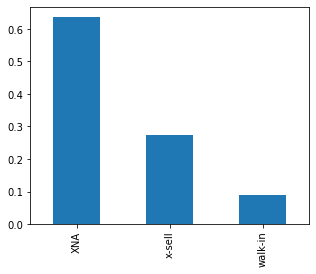

CHANNEL_TYPE


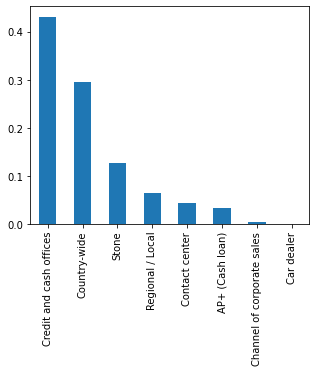

NAME_SELLER_INDUSTRY


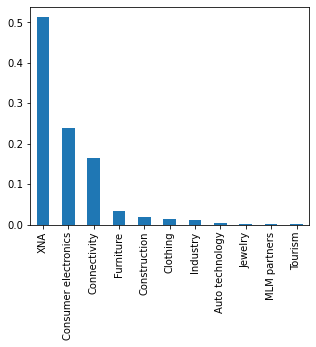

NAME_YIELD_GROUP


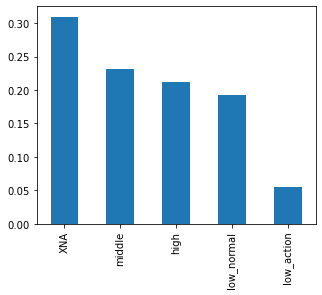

PRODUCT_COMBINATION


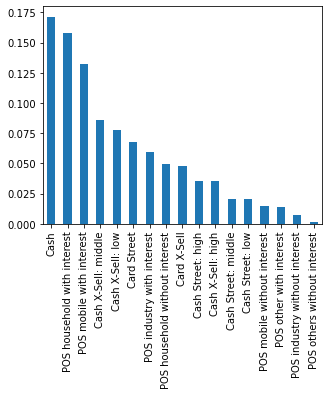

In [67]:
for x in categorical_column_PREV:
    plt.figure(figsize = [5,4])
    print(x)
    PA[x].value_counts(normalize = True).plot.bar()
    plt.show()

## CORRELATION between Numerical Columns

In [68]:
PA_CORR = PA[numerical_column_PREV].corr().abs()
PA_CORR

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,1.000000,0.000321,0.005276,0.003302,0.003659,0.008266,0.002652,0.002828,0.019100,0.001079,0.009506,0.006206,0.005818,0.008058,0.012650,0.013313,0.015672
SK_ID_CURR,0.000321,1.000000,0.000503,0.000280,0.000194,0.000312,0.002842,0.000098,0.000637,0.001265,0.000027,0.000903,0.000667,0.000056,0.000444,0.000233,0.000341
AMT_ANNUITY,0.005276,0.000503,1.000000,0.805558,0.811670,0.816293,0.023953,0.015693,0.190902,0.011641,0.406187,0.048376,0.047449,0.062142,0.048997,0.037199,0.187504
AMT_APPLICATION,0.003302,0.000280,0.805558,1.000000,0.975824,0.987143,0.014415,0.004310,0.133660,0.007649,0.681114,0.048395,0.032475,0.054869,0.102588,0.087486,0.148224
AMT_CREDIT,0.003659,0.000194,0.811670,0.975824,1.000000,0.971117,0.021039,0.025179,0.133763,0.009567,0.674387,0.022219,0.001056,0.026360,0.134590,0.127573,0.151351
AMT_GOODS_PRICE,0.008266,0.000312,0.816293,0.987143,0.971117,1.000000,0.026892,0.003426,0.194744,0.011733,0.676007,0.027907,0.032663,0.035837,0.088841,0.079123,0.108865
HOUR_APPR_PROCESS_START,0.002652,0.002842,0.023953,0.014415,0.021039,0.026892,1.000000,0.005789,0.039962,0.015671,0.041831,0.003290,0.003836,0.003205,0.001375,0.001838,0.063419
NFLAG_LAST_APPL_IN_DAY,0.002828,0.000098,0.015693,0.004310,0.025179,0.003426,0.005789,1.000000,0.016555,0.000912,0.058594,0.009532,0.006586,0.010828,0.017246,0.018466,0.021413
DAYS_DECISION,0.019100,0.000637,0.190902,0.133660,0.133763,0.194744,0.039962,0.016555,1.000000,0.018382,0.169552,0.050205,0.091218,0.004118,0.221477,0.179476,0.170787
SELLERPLACE_AREA,0.001079,0.001265,0.011641,0.007649,0.009567,0.011733,0.015671,0.000912,0.018382,1.000000,0.007734,0.003616,0.000732,0.002852,0.001054,0.000995,0.007396


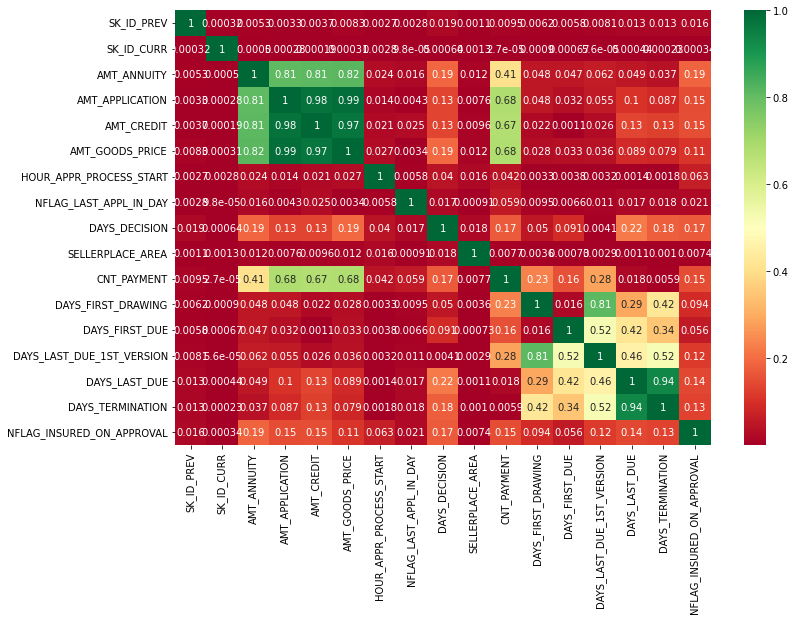

In [69]:
plt.figure(figsize = [12,8])
sns.heatmap(PA_CORR,annot = True,cmap='RdYlGn')
plt.show()

In [70]:
AD = pd.read_csv('application_data.csv')

In [71]:
# To analyse how consumer attributes and loan attributes influence the tendency of default. 
# We merge two files data and do a Bi variate Analysis

PA_merge = AD[['SK_ID_CURR','TARGET']].merge(PA, on = 'SK_ID_CURR',how = 'inner')

In [72]:
PA_merge

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,2073384,Cash loans,16400.610,229500.0,254340.0,229500.0,THURSDAY,12,...,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1413697,456255,0,1708056,Revolving loans,2250.000,45000.0,45000.0,45000.0,SUNDAY,14,...,Connectivity,0.0,XNA,Card Street,365243.0,-831.0,-361.0,-537.0,-499.0,0.0
1413698,456255,0,1296007,Cash loans,30737.655,765000.0,1067940.0,765000.0,FRIDAY,14,...,XNA,60.0,low_normal,Cash Street: low,365243.0,-831.0,-361.0,-537.0,-499.0,0.0
1413699,456255,0,2631384,Cash loans,54022.140,1170000.0,1271929.5,1170000.0,FRIDAY,14,...,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0


## Bivariate Analysis of Merged data

### Categorical columns(ALL) of Previous Application vs Categorical(TARGET column)

NAME_CONTRACT_TYPE


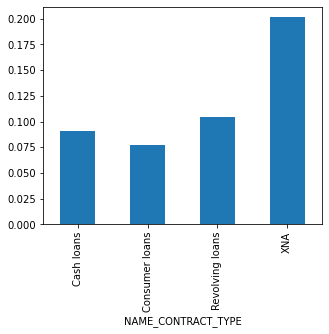

WEEKDAY_APPR_PROCESS_START


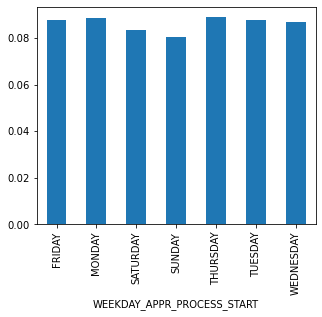

FLAG_LAST_APPL_PER_CONTRACT


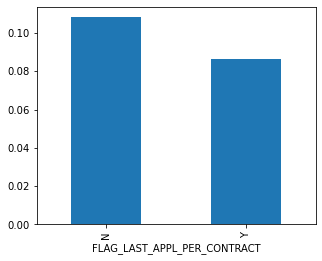

NAME_CASH_LOAN_PURPOSE


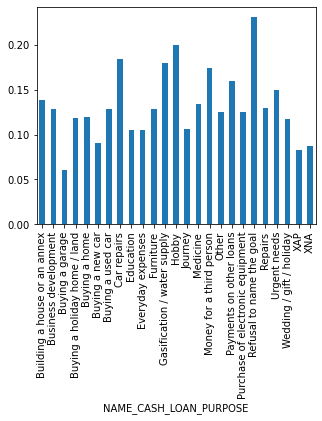

NAME_CONTRACT_STATUS


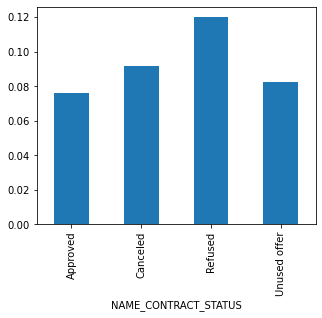

NAME_PAYMENT_TYPE


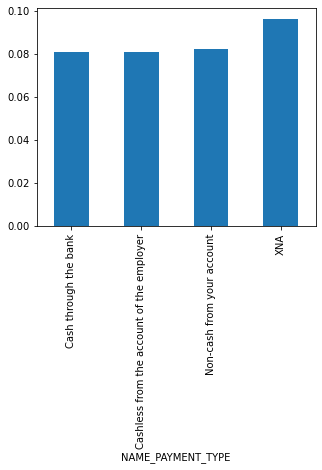

CODE_REJECT_REASON


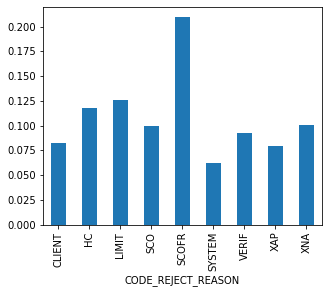

NAME_TYPE_SUITE


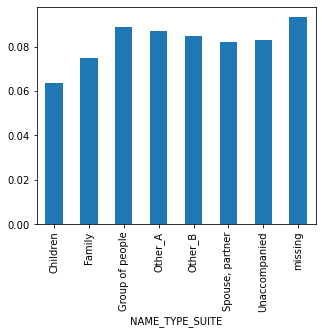

NAME_CLIENT_TYPE


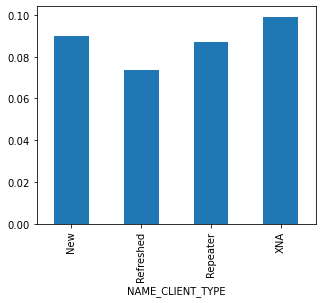

NAME_GOODS_CATEGORY


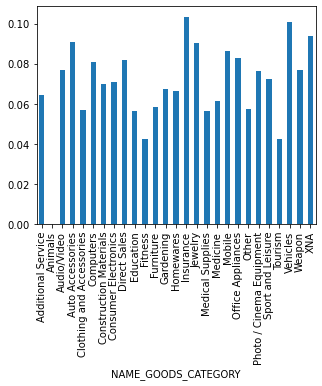

NAME_PORTFOLIO


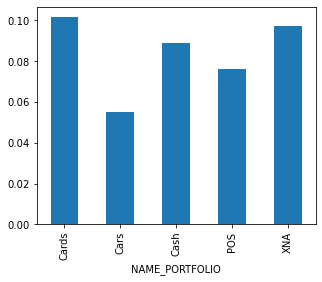

NAME_PRODUCT_TYPE


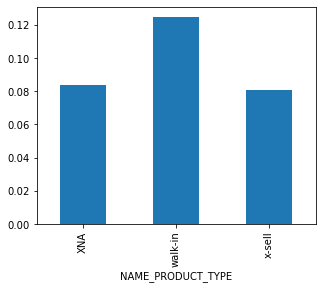

CHANNEL_TYPE


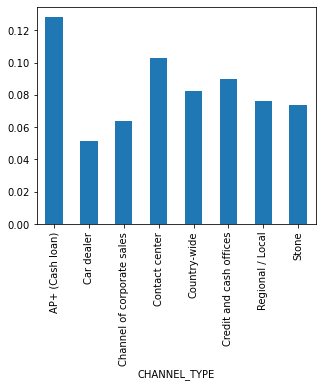

NAME_SELLER_INDUSTRY


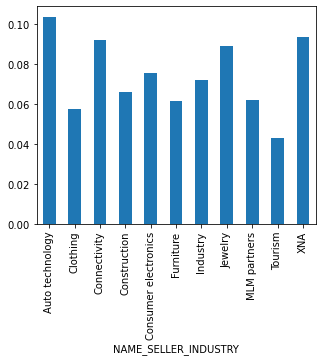

NAME_YIELD_GROUP


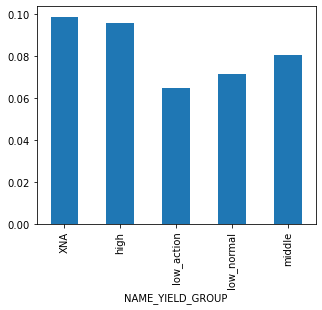

PRODUCT_COMBINATION


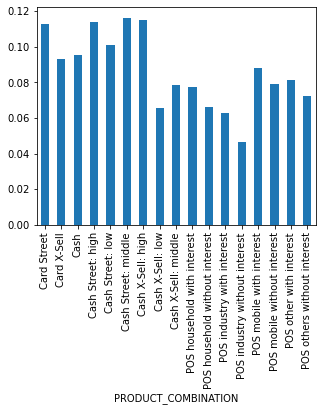

In [73]:
for x in categorical_column_PREV:
    print(x)
    plt.figure(figsize = [5,4])
    PA_merge.groupby(x)['TARGET'].mean().plot.bar()
    plt.show()

## Multivariate Analysis

### NAME_CONTRACT_STATUS vs CODE_REJECT_REASON vs TARGET

In [74]:
MV_res3 = pd.pivot_table(data = PA_merge,index = 'NAME_CONTRACT_STATUS', columns = 'CODE_REJECT_REASON',values = 'TARGET')
MV_res3

CODE_REJECT_REASON,CLIENT,HC,LIMIT,SCO,SCOFR,SYSTEM,VERIF,XAP,XNA
NAME_CONTRACT_STATUS,,,,,,,,,
Approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.075887,0.000000
Canceled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.091736,NaN
Refused,NaN,0.117342,0.125594,0.099982,0.209287,0.0625,0.092563,0.000000,0.101144
Unused offer,0.082517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


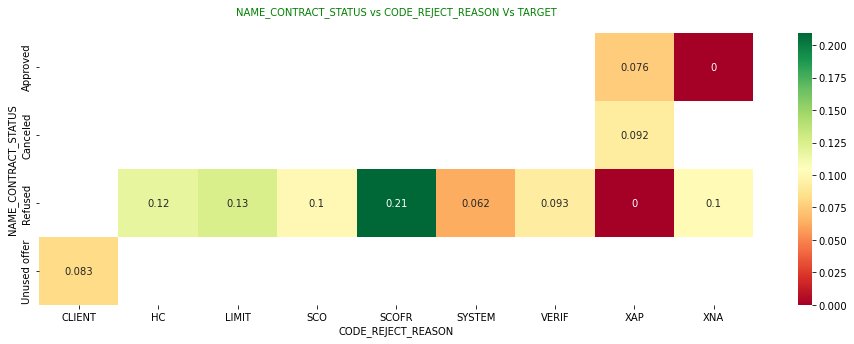

In [75]:
plt.figure(figsize = [16,5])
plt.title("NAME_CONTRACT_STATUS vs CODE_REJECT_REASON Vs TARGET\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})
sns.heatmap(MV_res3,annot = True,cmap = 'RdYlGn')
plt.show()

In [76]:

MV_res4 = pd.pivot_table(data = PA_merge,index = 'NAME_CLIENT_TYPE', columns = 'CODE_REJECT_REASON',values = 'TARGET')
MV_res4


CODE_REJECT_REASON,CLIENT,HC,LIMIT,SCO,SCOFR,SYSTEM,VERIF,XAP,XNA
NAME_CLIENT_TYPE,,,,,,,,,
New,0.089448,0.122125,0.126335,0.092618,0.169126,0.125000,0.064915,0.088894,0.125506
Refreshed,0.074324,0.128978,0.085942,0.093724,0.125767,0.000000,0.072115,0.067753,0.103448
Repeater,0.083338,0.116449,0.127295,0.101687,0.218733,0.062883,0.102564,0.078022,0.099302
XNA,0.103448,0.135593,0.047619,0.125000,0.363636,NaN,0.000000,0.090762,0.000000


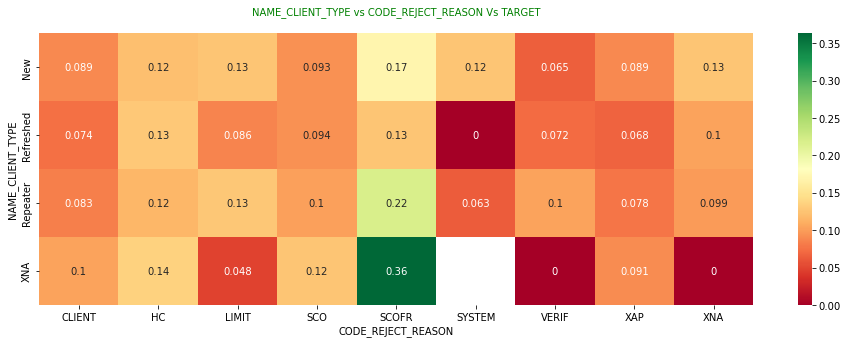

In [77]:
plt.figure(figsize = [16,5])
plt.title("NAME_CLIENT_TYPE vs CODE_REJECT_REASON Vs TARGET\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})
sns.heatmap(MV_res4,annot = True,cmap = 'RdYlGn')
plt.show()

In [78]:
MV_res5 = pd.pivot_table(data = PA_merge,index = 'NAME_CONTRACT_TYPE', columns = 'CODE_REJECT_REASON',values = 'TARGET')
MV_res5

CODE_REJECT_REASON,CLIENT,HC,LIMIT,SCO,SCOFR,SYSTEM,VERIF,XAP,XNA
NAME_CONTRACT_TYPE,,,,,,,,,
Cash loans,0.092593,0.118021,0.138658,0.127651,0.250053,0.145833,0.097245,0.081349,0.127907
Consumer loans,0.082337,0.102451,0.116929,0.080247,0.126551,0.107143,0.071287,0.073989,0.087124
Revolving loans,0.000000,0.124995,0.120544,0.110888,0.181358,0.053691,0.089888,0.096250,0.082134
XNA,NaN,0.259259,NaN,NaN,NaN,NaN,NaN,0.197183,0.000000


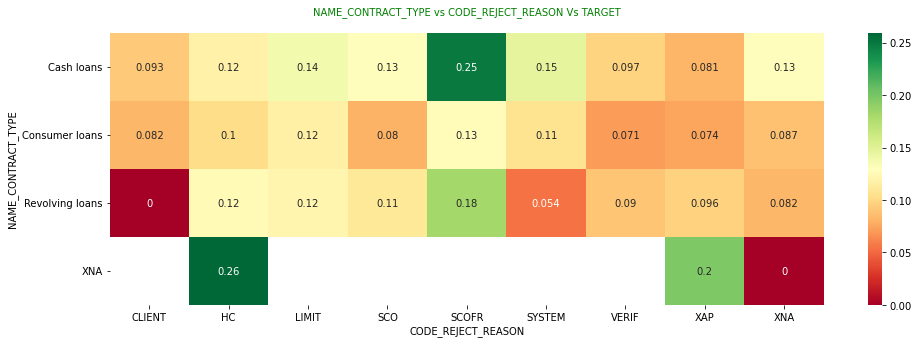

In [79]:
plt.figure(figsize = [16,5])
plt.title("NAME_CONTRACT_TYPE vs CODE_REJECT_REASON Vs TARGET\n", fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Green'})
sns.heatmap(MV_res5,annot = True,cmap = 'RdYlGn')
plt.show()